In [158]:
!python --version

Python 3.10.11


In [159]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) #Filtra warnings 
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [160]:
# Carregando arquivos e renomeando a coluna de classses
treino_file = pd.read_fwf('treinamento.txt')
treino_file.rename(columns={'0': 'digito'}, inplace=True)

teste_file = pd.read_fwf('teste.txt')
teste_file.rename(columns={'0': 'digito'}, inplace=True)

x = treino_file.drop('digito', axis=1)
y = treino_file['digito']
x_teste = teste_file.drop('digito',axis=1)
y_teste = teste_file['digito']

x = x.values
y = y.values
x_teste=x_teste.values
y_teste=y_teste.values


In [161]:
#Configurações
usePCA= True
n_components=2

valores_kmeans=[5,10,20]
valores_knn=[1,3,5]

classes = [0,1,2,3,4,5,6,7,8,9]
examples_per_class=100

In [162]:
# Normalização
ss = StandardScaler()
x = ss.fit_transform(x)
x_teste = ss.transform(x_teste)


In [163]:
#Configurando o PCA
if(usePCA):
  pca = PCA(n_components)
  pca.fit(x)
  x= pca.transform(x)
  x_teste= pca.transform(x_teste)


In [164]:


for num_centroides in valores_kmeans:

  km = KMeans(n_clusters=num_centroides)
  centroides=[]
  classes_y = []

  for classe in classes:
    #K-means de cada class
    start_index = classe * examples_per_class
    end_index= start_index + examples_per_class
    classes_y.extend([classe] * num_centroides)
    km.fit(x[start_index:end_index]) 
    #print(f"K-means da classe {classe}, índice {start_index} até {end_index}.")
    centroides.extend(km.cluster_centers_)

  centroides=np.array(centroides)
  #Treino e predict do KNN usando os centróides calculados
  for k in valores_knn:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(centroides, classes_y)
    predicted_labels = knn.predict(x_teste)
    print(f"Acurácia no teste: %.2f centroides {'com PCA' if usePCA else ''} = {num_centroides} , k = {k}" % (accuracy_score(y_teste, predicted_labels)))


Acurácia no teste: 0.50 centroides com PCA = 5 , k = 1
Acurácia no teste: 0.49 centroides com PCA = 5 , k = 3
Acurácia no teste: 0.50 centroides com PCA = 5 , k = 5
Acurácia no teste: 0.48 centroides com PCA = 10 , k = 1
Acurácia no teste: 0.49 centroides com PCA = 10 , k = 3
Acurácia no teste: 0.56 centroides com PCA = 10 , k = 5
Acurácia no teste: 0.49 centroides com PCA = 20 , k = 1
Acurácia no teste: 0.50 centroides com PCA = 20 , k = 3
Acurácia no teste: 0.52 centroides com PCA = 20 , k = 5


In [165]:
#Treino e predict do KNN a partir do conjunto completo
for k in valores_knn:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x,y)
  predicted_labels = knn.predict(x_teste)
  print(f"Acurácia no teste com conjunto completo {'com PCA' if usePCA else ''} : %.2f k = {k}" % (accuracy_score(y_teste, predicted_labels)))

Acurácia no teste com conjunto completo com PCA : 0.52 k = 1
Acurácia no teste com conjunto completo com PCA : 0.54 k = 3
Acurácia no teste com conjunto completo com PCA : 0.56 k = 5


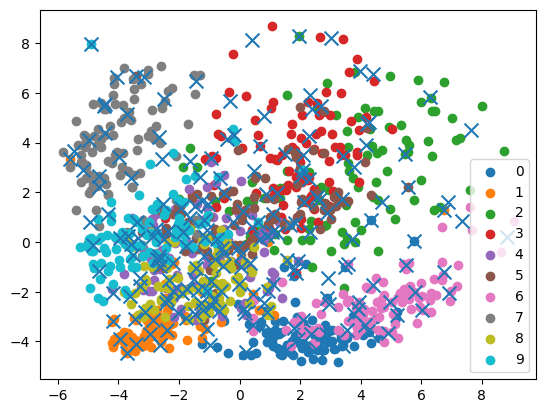

In [166]:
if(usePCA):
  #Plot dos pontos após PCA
  for digit_class in sorted(list(set(y))):
      indexes = y == digit_class
      plt.scatter(x[indexes,0], x[indexes,1], label=str(digit_class))
  plt.legend()
  #Plot dos centroides do último valor de [valores_kmeans]
  plt.scatter(centroides[:,0], centroides[:,1], s=100, marker='x')
